## Dominik Szot, 27.04.2023
### Laboratorium 07
### Kwadratury adaptacyjne

Zadanie 1 - Obliczanie wartości całki

Imoportowanie bibliotek.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as scp
import scipy.integrate as integrate
import matplotlib.ticker

Równania do numerycznego obliczenia oraz rozwiązania równań.

In [9]:
# Array of functions
functions = [int for _ in range(3)]

f3_h  = lambda x,a,b : 1/((x-a)**2 + b)

functions[0] = lambda x: np.double(4./(x**2 + 1))
functions[1] = lambda x: 0 if x == 0 else np.double(x ** 0.5 * np.log(x))
functions[2] = lambda x: f3_h(x, 0.3, 0.001) + f3_h(x, 0.9, 0.004) - 6

In [17]:
# Solutions of equasions
solutions = [None for _ in range(3)]

f3_helper_ans = lambda x0, a : 1/np.power(a, 0.5) * (np.arctan((1-x0)
                /np.power(a, 0.5))+np.arctan((x0)/np.power(a, 0.5)) )

solutions[0] = np.pi 
solutions[1] = -4/9
solutions[2] = f3_helper_ans(0.3, 0.001) + f3_helper_ans(0.9, 0.004) - 6 

* W celu obliczenia wartości całki za pomocą kwadratur adaptacyjnych trapezów używam funkcji `scipy.integrate.quad_vec()` 
* Kwadratury adaptacyjne Gaussa-Kronroda nie działają

In [11]:
def draw_plot(x_axis, y_axis, color, label, x_label):
    plt.gca().yaxis.set_major_formatter(matplotlib.ticker.LogFormatterSciNotation())
    plt.semilogy(x_axis, y_axis, linewidth=1, color=color, label=label)
    plt.legend()
    plt.xlabel(x_label)
    plt.ylabel("Błąd względny")

Obliczanie kwadratur adaptacyjnych

In [19]:
def adaptive_quadratures(f_x, f_actual):
    max_no_evaluations = 14
    a = 0 
    b = 1
    
    error_trapz = [np.double(0) for _ in range(max_no_evaluations)]
    error_gauss = [np.double(0) for _ in range(max_no_evaluations)]
    
    for i in range(max_no_evaluations + 1):
        error = 10**(-i)
        y1 = integrate.quad_vec(f_x, a, b, limit=10**7, epsrel=error,
                                quadrature='trapezoid')[0]
        
        y2 = integrate.quad_vec(f_x, a, b, limit=10**7, epsrel=error,
                                quadrature='gk21')[0]

        error_trapz[i-1] = np.abs((f_actual - y1)/f_actual)
        error_gauss[i-1] = np.abs((f_actual - y2)/f_actual)
    
    draw_plot([i for i in range(max_no_evaluations)], error_trapz, 
              "red", "Błąd względny kwadratur adaptacyjnych trapezów", "10**(-m)" )
    
    draw_plot([i for i in range(max_no_evaluations)], error_gauss, 
              "green", "Błąd względny kwadratur Gaussa-Kronroda", "10**(-m)" )

In [20]:
adaptive_quadratures(functions[0], solutions[0])
plt.title("Wykres wartości bezwzględnej błedu względnego w zależności od dopuszczalnej tolerancji")
plt.show()

adaptive_quadratures(functions[1], solutions[1])
plt.title("Wykres wartości bezwzględnej błedu względnego w zależności od dopuszczalnej tolerancji")
plt.show()

adaptive_quadratures(functions[2], solutions[2])
plt.title("Wykres wartości bezwzględnej błedu względnego w zależności od dopuszczalnej tolerancji")
plt.show()

In [ ]:
def rectangular_method(nodes, f_x) -> None:
    accumulated = 0.

    for i in range(1, len(nodes)):
        accumulated += (nodes[i] - nodes[i-1])*f_x(nodes[i-1] + (nodes[i] - nodes[i-1])/2)
    
    return accumulated

Powtórzone obliczenia z laboratorium 6.

In [15]:
def quadrature_methods(f_x, f_actual):
    max_no_evaluations = 14
    a = 0 
    b = 1

    error_trapz = [np.double(0) for i in range(max_no_evaluations-1)]
    error_simps = [np.double(0) for i in range(max_no_evaluations-1)]
    error_rectangle = [np.double(0) for i in range(max_no_evaluations-1)]
    
    for i in range(1, max_no_evaluations):
        no_nodes = 2**i + 1
        quadrature_nodes = np.array([np.double(a) + np.double(i) * 
                        np.double((b-a))/(no_nodes-1) for i in range(no_nodes)])
        
        quadrature_points = [f_x(i) for i in quadrature_nodes]

        result_trapz = integrate.trapezoid(quadrature_points, quadrature_nodes, 1)
        result_simps = integrate.simpson(quadrature_points, quadrature_nodes, 1)
        result_rectangle = rectangular_method(quadrature_nodes, f_x);

        error_trapz[i-1]=np.abs(((f_actual - result_trapz)/f_actual))
        error_simps[i-1]=np.abs(((f_actual - result_simps)/f_actual))
        error_rectangle[i-1]=np.abs((( f_actual - result_rectangle)/f_actual))
    
    draw_plot([i for i in range(1, max_no_evaluations)], error_trapz, 
              "cyan", "Błąd względny kwadratury trapezów", "m")
    
    draw_plot([i for i in range(1, max_no_evaluations)], error_simps, 
              "magenta", "Błąd względny kwadratury Simpsona", "m")
    
    draw_plot([i for i in range(1, max_no_evaluations)], error_rectangle, 
              "purple", "Błąd względny kwadratury prostokątów", "m")

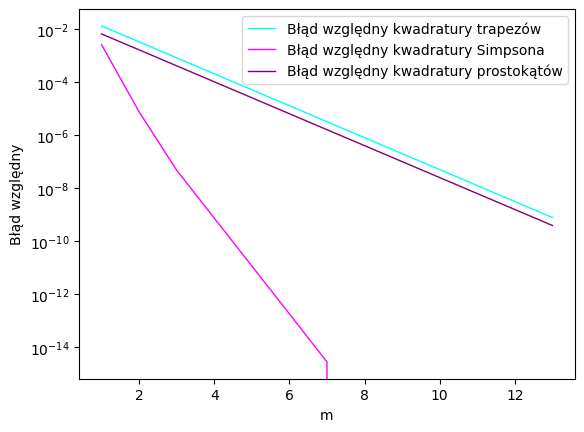

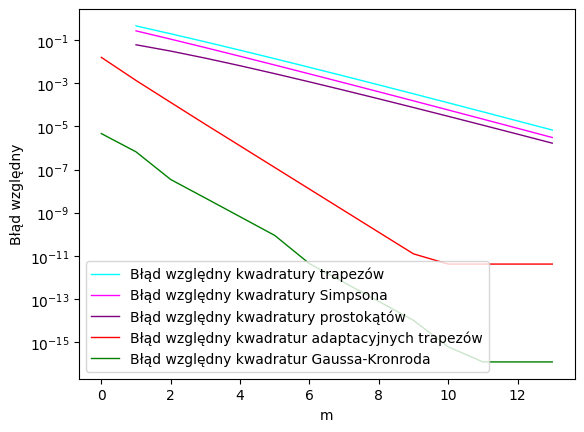

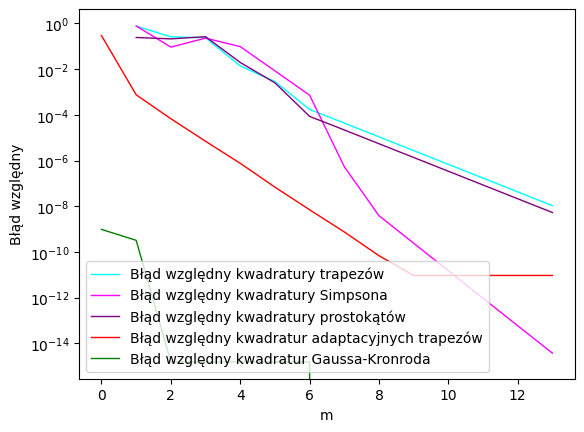

In [ ]:
quadrature_methods(functions[0], solutions[0])
plt.title("Wykres wartości bezwzględnej błedu względnego w zależności od m")
plt.show()

quadrature_methods(functions[1], solutions[1])
adaptive_quadratures(functions[1], solutions[1])
plt.title("Porównanie wykresów wartości błędu względnego kwadratur")
plt.show()

quadrature_methods(functions[2], solutions[2])
adaptive_quadratures(functions[2], solutions[2])
plt.title("Porównanie wykresów wartości błędu względnego kwadratur")
plt.show()

Kwadratury adaptacyjne dają zdecydowanie dokładniejsze wyniki niż kwadratury zwyczajne. <br>
Jest to spowodowane automatycznym dobieraniem liczby węzłów do obliczania funkcji. <br>
W porównaniu kwadratur adaptacyjnych wartość błędu względnego <br>
prawie zawsze spadała szybciej na korzyść kwadratur `Gaussa-Kronroda`.

### Bibliografia

* Katarzyna Rycerz: Wykłady z przedmiotu Metody Obliczeniowe w Nauce i Technice
* Marcin Kuta: Materiały z zajęć - Quadratures 